In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [2]:
airline_data = pd.read_csv("C:/Users/omiku/OneDrive/Desktop/Cloud Computing_Assignments/Assignment 2/Dataset-20191126T124207Z-001/Dataset/airline.csv")
#airline_data.head()

In [17]:
airline_data.groupby('airline_name')['overall_rating'].mean().sort_values(ascending=False).head()

airline_name
la-compagnie                10.0
danish-air                  10.0
beijing-capital-airlines    10.0
loganair                    10.0
eastarjet                   10.0
Name: overall_rating, dtype: float64

In [3]:
ratings_mean_count = pd.DataFrame(airline_data.groupby('airline_name')['overall_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(airline_data.groupby('airline_name')['overall_rating'].count())
ratings_mean_count.head()

,overall_rating,rating_counts
airline_name,,
adria-airways,6.885714,35
aegean-airlines,7.823789,227
aer-lingus,7.289817,383
aerocaribbean,3.333333,3
aeroflot-russian-airlines,6.737288,236


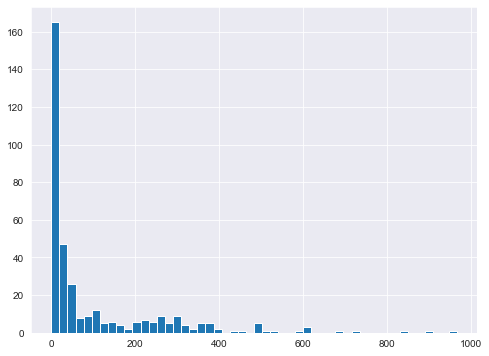

In [19]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

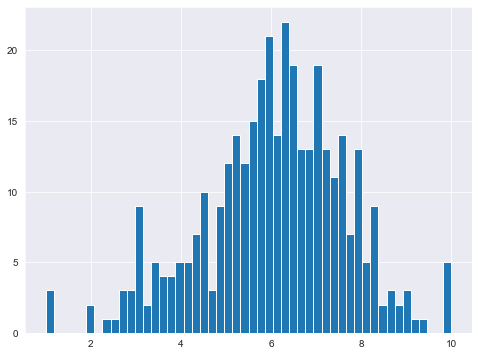

In [4]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['overall_rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

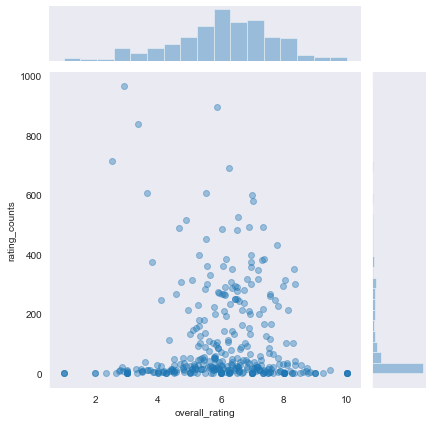

In [5]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='overall_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [6]:
user_airline_rating = airline_data.pivot_table(index='author', columns='airline_name', values='overall_rating')
#user_airline_rating.head()

In [7]:
airline_name = input("Please enter airline name:")

Please enter airline name:lufthansa


In [8]:
# emirates_ratings =user_airline_rating[user_airline_rating['emirates'].notnull()]
# emirates_ratings = emirates_ratings['emirates']
# emirates_ratings.head()

airline_name_ratings =user_airline_rating[user_airline_rating[''+airline_name].notnull()]
airline_name_ratings = airline_name_ratings[''+airline_name]
#airline_name_ratings.head()


airlines_like_airline_name = user_airline_rating.corrwith(airline_name_ratings)
corr_airlines = pd.DataFrame(airlines_like_airline_name, columns=['Correlation'])
corr_airlines.dropna(inplace=True)
#corr_airlines.head()

corr_airlines = corr_airlines.join(ratings_mean_count['rating_counts'])
#corr_airlines.head(50)

corr_airlines = corr_airlines[corr_airlines ['rating_counts']>100].sort_values('Correlation', ascending=False)
corr_airlines = corr_airlines.head(10)
corr_airlines = corr_airlines.sort_values(['rating_counts'],ascending=False )
corr_airlines

C:\Users\omiku\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\omiku\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,rating_counts
airline_name,,
lufthansa,1.000000,600
virgin-atlantic-airways,1.000000,453
jetstar-airways,1.000000,333
thomas-cook-airlines,1.000000,316
wizz-air,1.000000,225
hawaiian-airlines,0.941380,211
oman-air,1.000000,167
kenya-airways,1.000000,162
condor-airlines,0.997326,137
